# Stardard NN su database FASHION MNIST

Neural network sviluppata in TensorFlow versione 1.x, su database FASHION MNIST.

In questo notebook lo scopo è testare il modello con un altro database; per spiegazioni più dettagliate, guardare la versione corrispondente al modello su database MNIST.

In [0]:
%tensorflow_version 1.x

In [2]:
import tensorflow as tf
from tensorflow import keras as ks

tf.__version__

'1.15.0'

In [3]:
from tensorflow import keras as ks
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
#Per data visualization
import seaborn as sns

import time

print("Done")

Done


##Definizione metodi

In [4]:
class TimeHistory(ks.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

print("Done")

Done


In [5]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

print("Done")

Done


#Import del dataset

In [6]:
#Import del database MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#Struttura dati nel database
print("Numero elementi e dimensione immagini in train set: " + str(train_images.shape))
print("Numero elementi e dimensione immagini in test set: " + str(test_images.shape))
print("Numero elementi label in train set: " + str(len(train_labels)))
print("Numero elementi label in test set: " + str(len(test_labels)))
print("Tipo di struttura del train set: " + str(type(train_images)) + ", composto da " + str(type(train_images[0])))
print("Tipo di struttura del label set: " + str(type(train_labels)) + ", composto da " + str(type(train_labels[0])))
print("Le etichette sono interi; valore più piccolo: " + str(np.amin(train_labels)) + ", valore più grande: " + str(np.amax(train_labels)))

4423680/4422102 [==============================] - 0s 0us/step
Numero elementi e dimensione immagini in train set: (60000, 28, 28)
Numero elementi e dimensione immagini in test set: (10000, 28, 28)
Numero elementi label in train set: 60000
Numero elementi label in test set: 10000
Tipo di struttura del train set: <class 'numpy.ndarray'>, composto da <class 'numpy.ndarray'>
Tipo di struttura del label set: <class 'numpy.ndarray'>, composto da <class 'numpy.uint8'>
Le etichette sono interi; valore più piccolo: 0, valore più grande: 9


##Formato database

Il database ha la stessa struttura del database MNIST.

Il database è diviso in training set e testing set.

Nel training set ci sono, anche qui come il database MNIST, 60k immagini 28x28, e 60k etichette.

Nel test set ci sono 10k immagini 28x28 e 10k etichette.

L'immagine è formata da valori che variano da 0 a 255, e le etichette sono un intero tra 0 e 9.

Costruisco anche un array per poter trasformare da intero a stringa la tipologia dell'immagine.


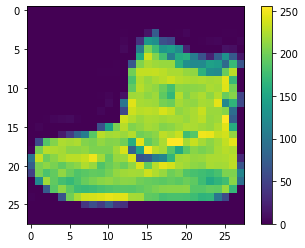

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

#L'etichetta è un intero tra 0 e 9
train_labels

##Preprocessing dati

In [0]:
#Preprocessing dei dati
#Scalo i valori nel range tra 0 e 1
train_images = train_images / 255.0

test_images = test_images / 255.0

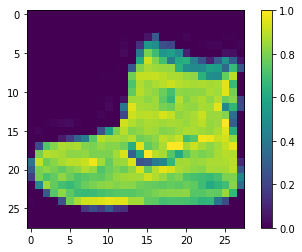

In [9]:
#Controllo lo scaling dei dati
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
               
print("Done")

Done


Guardo un piccolo insieme di immagini con etichette corrispondenti assegnate.

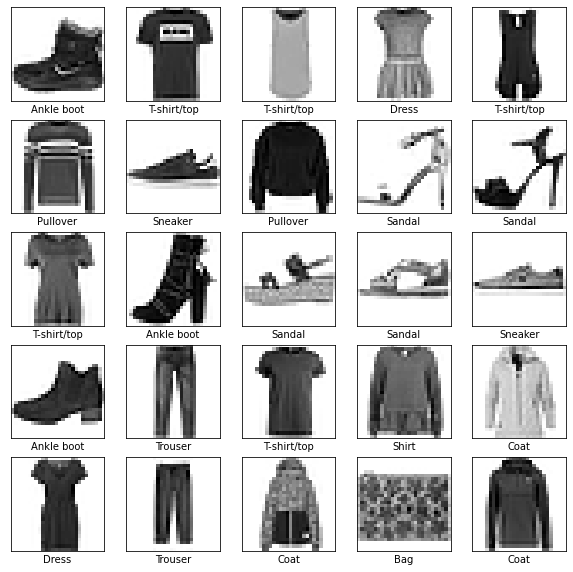

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    #class_names[train_labels[i]]
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#Costruzione del modello

##Build

In [12]:
keras_model = ks.models.Sequential()
keras_model.add(ks.layers.Flatten(input_shape=[28, 28]))
keras_model.add(ks.layers.Dense(256, activation='relu'))
keras_model.add(ks.layers.Dense(128, activation='relu'))
keras_model.add(ks.layers.Dense(10, activation='softmax'))

#Modello più semplice
#keras_model.add(ks.layers.Flatten(input_shape=[28, 28]))
#keras_model.add(ks.layers.Dense(128, activation='relu'))
#keras_model.add(ks.layers.Dense(10, activation='softmax'))

print("Done")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Done


##Compile

In [13]:
keras_model.compile(optimizer = 'adam', 
                    loss = 'sparse_categorical_crossentropy', 
                    metrics = ['accuracy'])

print(keras_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
None


##Training del modello

In [14]:
time_callback = TimeHistory()

history = keras_model.fit(train_images, train_labels, validation_data=(test_images, test_labels),
                          epochs=10, callbacks=[time_callback])

print("Done")

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.4750 - acc: 0.8298 - val_loss: 0.4026 - val_acc: 0.8561
Epoch 2/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.3591 - acc: 0.8680 - val_loss: 0.3768 - val_acc: 0.8638
Epoch 3/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.3223 - acc: 0.8811 - val_loss: 0.3519 - val_acc: 0.8732
Epoch 4/10
60000/60000 [==============================] - 7s 108us/sample - loss: 0.3024 - acc: 0.8885 - val_loss: 0.3916 - val_acc: 0.8560
Epoch 5/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2827 - acc: 0.8946 - val_loss: 0.3360 - val_acc: 0.8814
Epoch 6/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.2685 - acc: 0.8985 - val_loss: 0.3359 - val_acc: 0.8784
Epoch 7/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2561 - acc: 0.9032 - val_l

##Accuratezza

In [15]:
#Misuro accuratezza
test_accuracy = keras_model.evaluate(test_images, test_labels)

print("Accuratezza: " + str(test_accuracy))

print("Time per epoch: " + str(time_callback.times))
total_time = time_callback.times
total_time_str = sum(total_time)
print("Total time: " + str(total_time_str))

print("Done")

10000/10000 [==============================] - 0s 45us/sample - loss: 0.3259 - acc: 0.8874
Accuratezza: [0.32587616944313047, 0.8874]
Time per epoch: [7.0246288776397705, 6.521690607070923, 6.380720615386963, 6.500633716583252, 6.40588641166687, 6.845783710479736, 6.695127487182617, 6.506278991699219, 6.348596096038818, 6.8739635944366455]
Total time: 66.10331010818481
Done


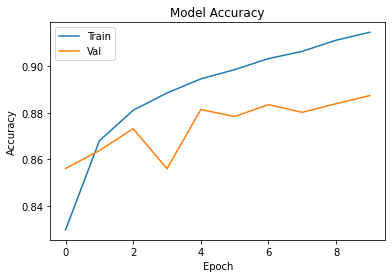

Time per epoch: [7.0246288776397705, 6.521690607070923, 6.380720615386963, 6.500633716583252, 6.40588641166687, 6.845783710479736, 6.695127487182617, 6.506278991699219, 6.348596096038818, 6.8739635944366455]
Total time: 66.10331010818481


In [16]:
#Visualize the models accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

print("Time per epoch: " + str(time_callback.times))
total_time = time_callback.times
total_time_str = sum(total_time)
print("Total time: " + str(total_time_str))

#Test di predizione
Col modello addestrato, possiamo usarlo per fare predizioni su alcune immagini.

In [17]:
predictions = keras_model.predict(test_images)

print("Done")

Done


Costruisco un grafico per guardare meglio alla predizione di più immagini.

Guardo l'immagine 0, la predizione e all'array di predizione.

Previsioni corrette delle labels sono blu e le incorrette sono rosse.

Il numero fornisce la percentuale per la label predetta.

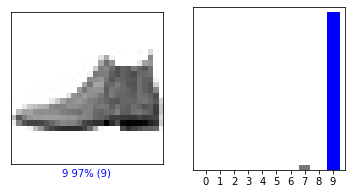

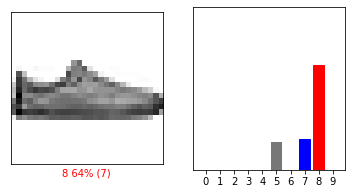

In [18]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Faccio il plot di diverse immagini con le loro predizioni. Il modello può essere sbagliato anche quando molto "confidente".

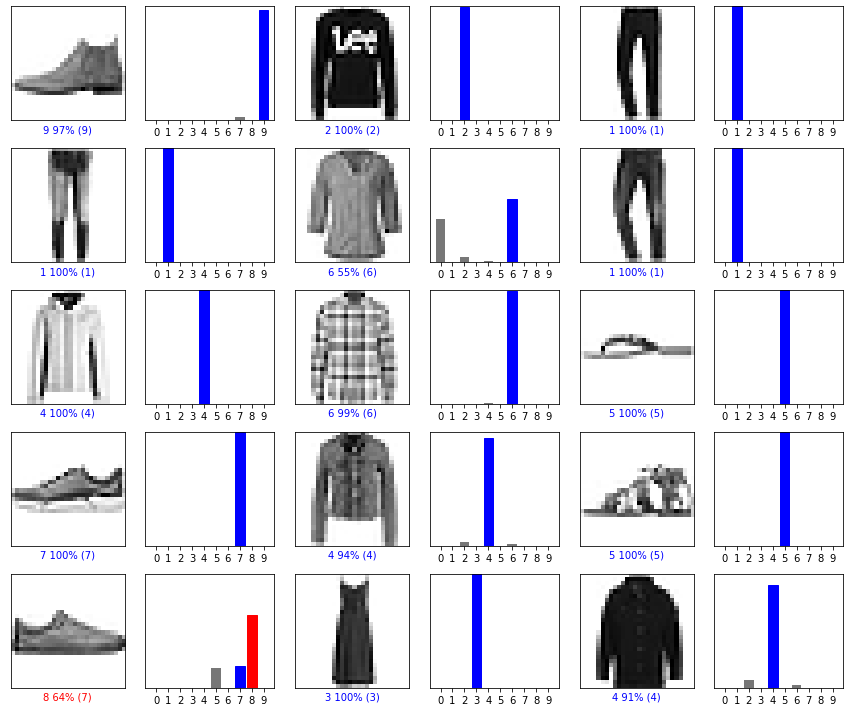

In [19]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Ricorda che

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

##Matrice di confusione

Genero la matrice di confusione.

In [20]:
#Necessito di un array con tutte le labels, ho già class_names

test_predictions = keras_model.predict_classes(test_images)

conf_matr = confusion_matrix(y_true = test_labels, y_pred = test_predictions)
print(conf_matr)

con_mat_norm = np.around(conf_matr.astype('float') / conf_matr.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                          index = class_names, 
                          columns = class_names)

[[892   0  13  32   5   0  53   0   5   0]
 [  5 974   1  17   1   0   1   0   1   0]
 [ 22   0 808  17 106   0  47   0   0   0]
 [ 24   7   6 932  14   0  13   0   4   0]
 [  1   1  78  52 826   0  41   0   1   0]
 [  0   0   0   1   0 959   0  29   5   6]
 [198   0  99  32  75   0 589   0   7   0]
 [  0   0   0   0   0   6   0 979   3  12]
 [  7   0   2   5   4   1   2   1 978   0]
 [  0   0   0   0   0  10   1  52   0 937]]


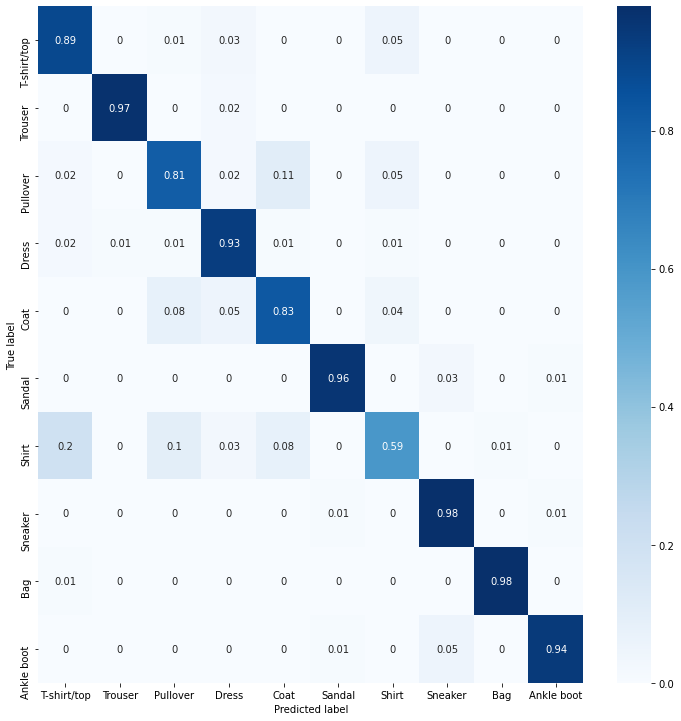

In [21]:
figure = plt.figure(figsize=(10, 10))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()